# Chromosome identifier

 David Alexander Núñez Quintero

## Introduction

Chromosome identification is a cornerstone of genetic research and clinical diagnostics. Accurate detection and classification of chromosomes are essential for diagnosing genetic disorders, guiding prenatal care, and other fields. Traditional manual methods for chromosomal analysis, while reliable, are labor-intensive and time-consuming, making them less practical in high-demand medical environments.

The development of a neural network for chromosome identification offers a promising solution to these challenges. By automating the detection and classification process, neural networks can significantly enhance the efficiency of chromosomal analysis. This technological advancement is particularly important in several key areas:

1. **Diagnosis of Genetic Disorders**: Early and precise identification of chromosomal abnormalities can lead to timely interventions for conditions such as Down syndrome, Edwards syndrome, and Patau syndrome. Automated systems can provide rapid and accurate diagnostics, essential for improving patient outcomes.

2. **Prenatal Screening and Care**: In prenatal care, efficient chromosomal analysis is crucial for assessing fetal health. Automating this process with neural networks can reduce the workload on medical personnel and ensure faster, more accurate results, which are vital for making informed medical decisions during pregnancy.


![ArchitectureImage](https://drive.google.com/uc?export=view&id=12Qw-4uMoIx56IMYPG6YOSbmQOdlZHxjP)


## Base proyect

This proyect is based on the article

> [An Open Dataset of Annotated Metaphase Cell Images for Chromosome Identification](https://www.nature.com/articles/s41597-023-02003-7#Sec6)

In the article the authors share a data set with which they trained a neural network based on the [YOLOv4](https://github.com/argusswift/YOLOv4-pytorch) model, a type of specialized model for object detection and classification, and they obtained an accuraccy of 98.88% in chromosomal identification.



## Dataset and Features


Initial dataset from the article contains 4994 annotations of 24 chromosome categories. Chromosomes can be categorized based on their size and the position of the centromere. Human chromosomes are traditionally grouped into seven categories labeled A through G.

#### Group A (1 - 3)
- **Chromosomes 1, 2, and 3**
  - **Type**: Large metacentric chromosomes
  - **Characteristics**: These are the largest chromosomes and have a central centromere.

#### Group B (4 - 5)
- **Chromosomes 4 and 5**
  - **Type**: Large submetacentric chromosomes
  - **Characteristics**: Slightly smaller than group A, with a centromere that creates one long arm and one short arm.

#### Group C (6 - 12, X)
- **Chromosomes 6, 7, 8, 9, 10, 11, 12, and X**
  - **Type**: Medium-sized submetacentric chromosomes
  - **Characteristics**: These chromosomes have a noticeable size decrease from groups A and B, with similar arm length differences. The X chromosome is also included in this group.

#### Group D (13 - 15)
- **Chromosomes 13, 14, and 15**
  - **Type**: Medium-sized acrocentric chromosomes
  - **Characteristics**: These chromosomes have the centromere near one end, producing a very short p arm and a longer q arm.

#### Group E (16 - 18)
- **Chromosomes 16, 17, and 18**
  - **Type**: Short metacentric (chromosome 16) and short submetacentric (chromosomes 17 and 18)
  - **Characteristics**: These chromosomes are shorter than those in the previous groups, with chromosome 16 being metacentric and chromosomes 17 and 18 being submetacentric.

#### Group F (19 - 20)
- **Chromosomes 19 and 20**
  - **Type**: Short metacentric chromosomes
  - **Characteristics**: These are small chromosomes with a central centromere.

#### Group G (21 - 22, Y)
- **Chromosomes 21, 22, and Y**
  - **Type**: Short acrocentric chromosomes
  - **Characteristics**: These are the smallest chromosomes. Chromosomes 21 and 22 have the centromere near one end, while the Y chromosome, involved in male sex determination, is also included in this group.


The data set was compiled from the data of 1,598 fetuses of pregnant women undergoing prenatal chromosomal studies between 2014 and 2021 at the Cytogenetic Laboratory, Department of Women’s Medicine, Taichung Veterans General Hospital.

The dataset contain a folder of images and a folder of annotations. Content includes the file name, image size, file path, category, and object box coordinates or segmentation coordinates for each chromosomal image. All chromosomal annotations represent markers made by an assistant trained for 3 months by specialist technicians within the department, and the results were acceptable.

The previous dataset was upload to [Roboflow](https://https://roboflow.com/about#:~:text=Roboflow%20empowers%20developers%20to%20build,deploy%20a%20computer%20vision%20model.), an online tool to procces this type of data, with this tool de images were resized to 640x640 and splited in train(2995 images), validation(999 images) and test(1000 images) sets. And were exported in YOLOV8 format a especial format to train our model.

![ArchitectureImage](https://drive.google.com/uc?export=view&id=147a4M6f8y1N68l8Xl3DZ6lx_y-LA2jRV)



## Method

We are gonna use YOLOv8 (You Only Look Once Version 8) is a state-of-the-art object detection framework developed by Ultralytics. It suitable for real-time applications.
YOLOv8 can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/). See [YOLOv8 Tasks Docs](https://docs.ultralytics.com/tasks/) for more information.

<br><img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">

YOLOv8 excels at finding and recognizing objects in both images and videos.
It uses bounding boxes to differentiate between objects and pinpoint their precise locations.
let’s break down the architecture:

<!--- ![Your Image Description](./NotebookImages/architeZZcture.jpg) --->
![ArchitectureImage](https://drive.google.com/uc?export=view&id=1-hxi-IN_x8B6uuHHzl5C982_bbZsZNpb)


*   **Backbone:** This is the convolutional neural network (CNN) responsible for extracting features from the input image. YOLOv8 uses a custom CSPDarknet53 backbone, which employs cross-stage partial connections to improve information flow between layers and boost accuracy.
*  **Neck:** The neck, also known as the feature extractor, merges feature maps from different stages of the backbone to capture information at various scales. YOLOv8 utilizes a novel C2f module instead of the traditional Feature Pyramid Network (FPN). This module combines high-level semantic features with low-level spatial information, leading to improved detection accuracy, especially for small objects.
*   **Head:** The head is responsible for making predictions. YOLOv8 employs multiple detection modules that predict bounding boxes, objectness scores, and class probabilities for each grid cell in the feature map. These predictions are then aggregated to obtain the final detections.


### Evaluation metric

#### mAP50 (mean Average Precision at 50% IoU)
Measures the mean Average Precision when the Intersection over Union (IoU) threshold is set to 50%.
IoU is a metric that measures the overlap between the predicted bounding box and the ground truth bounding box. An IoU of 50% means that the predicted bounding box overlaps with the ground truth bounding box by at least 50%.

To calculate mAP50:

*   Precision is calculated as the ratio of true positive detections to the sum of true positive and false positive detections.
*   Recall is the ratio of true positive detections to the sum of true positive and false negative detections.
*   Precision and recall values are computed at different thresholds (e.g., confidence scores) to create a Precision-Recall (PR) curve.
*   The Average Precision (AP) is calculated as the area under the PR curve.
*   The mean of APs across all classes (for multi-class detection) gives the mAP50.

#### mAP50-95 (mean Average Precision averaged over IoU thresholds from 50% to 95%)

Provides a more comprehensive evaluation by averaging the AP over multiple IoU thresholds, ranging from 50% to 95% in increments of 5% (i.e., 50%, 55%, 60%, ..., 95%).
This metric is more stringent as it considers the precision and recall at higher IoU thresholds, requiring the predicted bounding boxes to more closely match the ground truth boxes.


## Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml)

In [5]:
%pip install ultralytics
import ultralytics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from ultralytics import YOLO
from matplotlib.pyplot import figure

ultralytics.checks()

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


## Train

YOLOv8 models can be loaded from a trained checkpoint or created from scratch.

In [4]:
# Load a model
model = YOLO('Weight/yolov8n.pt')  # load a pretrained model

# Use the model
results = model.train(
    data='/chromosoma-1/data.yaml',
    epochs=45,
    device=0,
    seed = 24,
    imgsz=640,
    plots = True)  # train the model

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/NeuralNetworksFinalProyect/Weight/yolov8n.pt, data=/content/drive/MyDrive/NeuralNetworksFinalProyect/chromosoma-1/data.yaml, epochs=45, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=24, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

100%|██████████| 755k/755k [00:00<00:00, 88.5MB/s]


Overriding model.yaml nc=80 with nc=24

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/NeuralNetworksFinalProyect/chromosoma-1/train/labels.cache... 2995 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2995/2995 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/NeuralNetworksFinalProyect/chromosoma-1/valid/labels.cache... 999 images, 0 backgrounds, 0 corrupt: 100%|██████████| 999/999 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000357, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train11
Starting training for 45 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/45      4.96G      1.419      4.175      1.209        228        640: 100%|██████████| 188/188 [18:18<00:00,  5.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]


                   all        999      45907     0.0852      0.514     0.0908     0.0689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/45      4.47G      1.235      2.909      1.112        137        640: 100%|██████████| 188/188 [01:22<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]


                   all        999      45907      0.163      0.432      0.168      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/45      5.35G      1.155       2.36      1.082        276        640: 100%|██████████| 188/188 [01:24<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]


                   all        999      45907      0.217      0.487      0.244      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/45      3.84G      1.087      2.072      1.056        167        640: 100%|██████████| 188/188 [01:21<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:21<00:00,  1.48it/s]


                   all        999      45907      0.322      0.573      0.364      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/45       5.4G      1.061      1.925      1.048        157        640: 100%|██████████| 188/188 [01:23<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:20<00:00,  1.53it/s]


                   all        999      45907      0.392      0.576      0.442      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/45      4.82G      1.035      1.821      1.033         97        640: 100%|██████████| 188/188 [01:23<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:21<00:00,  1.52it/s]


                   all        999      45907      0.443      0.605       0.51      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/45      4.57G      1.023      1.735      1.029        153        640: 100%|██████████| 188/188 [01:22<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:20<00:00,  1.53it/s]


                   all        999      45907       0.39      0.588      0.474      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/45      5.13G      1.022      1.658      1.027        226        640: 100%|██████████| 188/188 [01:24<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:20<00:00,  1.53it/s]


                   all        999      45907      0.523      0.627      0.594      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/45      4.73G      1.003      1.598      1.015        111        640: 100%|██████████| 188/188 [01:22<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:19<00:00,  1.64it/s]


                   all        999      45907      0.533      0.632      0.602      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/45      4.54G     0.9958      1.538      1.016        130        640: 100%|██████████| 188/188 [01:23<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:20<00:00,  1.55it/s]


                   all        999      45907      0.493      0.619      0.576      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/45      3.94G     0.9916      1.484      1.013        209        640: 100%|██████████| 188/188 [01:24<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]


                   all        999      45907      0.647       0.68      0.716      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/45      4.19G     0.9767      1.425      1.007        284        640: 100%|██████████| 188/188 [01:22<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.69it/s]


                   all        999      45907      0.679      0.708      0.751      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/45      4.65G     0.9701      1.376      1.001        134        640: 100%|██████████| 188/188 [01:24<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.70it/s]


                   all        999      45907      0.718      0.719      0.784      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/45      4.96G     0.9706      1.338      1.005        204        640: 100%|██████████| 188/188 [01:22<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]


                   all        999      45907      0.744      0.734      0.804      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/45      4.85G      0.964      1.295     0.9974        125        640: 100%|██████████| 188/188 [01:22<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.71it/s]


                   all        999      45907      0.767      0.741      0.828      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/45      4.58G     0.9613      1.263     0.9961        196        640: 100%|██████████| 188/188 [01:25<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.78it/s]


                   all        999      45907       0.77       0.74      0.823      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/45      3.43G     0.9554      1.231     0.9945        113        640: 100%|██████████| 188/188 [01:21<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]


                   all        999      45907        0.8       0.77      0.858      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/45      4.55G     0.9494      1.196     0.9908        233        640: 100%|██████████| 188/188 [01:25<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]


                   all        999      45907       0.82      0.781      0.872      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/45      4.53G     0.9452      1.169     0.9927        190        640: 100%|██████████| 188/188 [01:22<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]


                   all        999      45907       0.83      0.791      0.885        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/45      4.89G     0.9491      1.153     0.9934        197        640: 100%|██████████| 188/188 [01:22<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]


                   all        999      45907      0.847      0.804      0.895      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/45      4.67G      0.945      1.121     0.9872        199        640: 100%|██████████| 188/188 [01:24<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]


                   all        999      45907      0.852      0.804      0.897      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/45      4.17G     0.9387      1.097     0.9849        196        640: 100%|██████████| 188/188 [01:25<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]


                   all        999      45907      0.851      0.802      0.898      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/45      4.51G     0.9351      1.091     0.9832        193        640: 100%|██████████| 188/188 [01:21<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]


                   all        999      45907       0.87      0.821      0.912       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/45      4.94G      0.932      1.076     0.9813         61        640: 100%|██████████| 188/188 [01:21<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.72it/s]


                   all        999      45907      0.864      0.818      0.915      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/45      3.47G     0.9241      1.048     0.9782        214        640: 100%|██████████| 188/188 [01:25<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]


                   all        999      45907      0.882      0.827       0.92      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/45      3.69G     0.9228      1.032       0.98         92        640: 100%|██████████| 188/188 [01:22<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:19<00:00,  1.68it/s]


                   all        999      45907      0.888      0.832      0.926      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/45      4.33G     0.9179      1.026     0.9768        129        640: 100%|██████████| 188/188 [01:21<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.69it/s]


                   all        999      45907      0.873      0.832      0.922      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/45      4.32G     0.9149      1.005     0.9746        336        640: 100%|██████████| 188/188 [01:23<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]


                   all        999      45907      0.892      0.849      0.935      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/45      3.89G     0.9127     0.9976     0.9737        244        640: 100%|██████████| 188/188 [01:26<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]


                   all        999      45907        0.9       0.85      0.936      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/45      4.19G     0.9149     0.9953     0.9737        180        640: 100%|██████████| 188/188 [01:21<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]


                   all        999      45907      0.899      0.853      0.937      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/45      3.69G     0.9076     0.9863     0.9705        107        640: 100%|██████████| 188/188 [01:22<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]


                   all        999      45907       0.89      0.848      0.935       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/45      4.48G     0.9053     0.9717     0.9689        273        640: 100%|██████████| 188/188 [01:21<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]


                   all        999      45907      0.906       0.86      0.941      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/45      4.93G     0.9118     0.9703      0.971        307        640: 100%|██████████| 188/188 [01:24<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]


                   all        999      45907       0.91      0.865      0.944      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/45      5.64G     0.9023     0.9561     0.9683        375        640: 100%|██████████| 188/188 [01:22<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.72it/s]


                   all        999      45907      0.912      0.867      0.946      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/45      4.61G     0.9038     0.9522     0.9641        173        640: 100%|██████████| 188/188 [01:21<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]


                   all        999      45907      0.911      0.867      0.946      0.754
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/45       2.6G     0.8281     0.7695     0.9539        131        640: 100%|██████████| 188/188 [01:32<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]


                   all        999      45907        0.9      0.862      0.943      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/45      2.31G     0.8203      0.746     0.9491        135        640: 100%|██████████| 188/188 [01:16<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]


                   all        999      45907      0.913       0.87      0.948      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/45      2.31G      0.813     0.7341     0.9457        138        640: 100%|██████████| 188/188 [01:15<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]


                   all        999      45907      0.915      0.874       0.95      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/45      2.41G     0.8136     0.7318     0.9454        133        640: 100%|██████████| 188/188 [01:15<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]


                   all        999      45907      0.921      0.876      0.952      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/45      2.31G      0.808     0.7216     0.9446        134        640: 100%|██████████| 188/188 [01:17<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]


                   all        999      45907      0.918      0.878      0.952      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/45      2.41G     0.8106     0.7208     0.9434        129        640: 100%|██████████| 188/188 [01:16<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]


                   all        999      45907      0.917      0.879      0.953      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/45      2.41G     0.8073     0.7151      0.944        131        640: 100%|██████████| 188/188 [01:16<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]


                   all        999      45907      0.919      0.882      0.954      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/45      2.41G     0.8079     0.7132     0.9448        137        640: 100%|██████████| 188/188 [01:16<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


                   all        999      45907      0.922       0.88      0.955      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/45      2.31G     0.8032      0.709     0.9405        134        640: 100%|██████████| 188/188 [01:16<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.96it/s]


                   all        999      45907      0.923       0.88      0.954      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/45      2.41G     0.8009     0.7074      0.942        133        640: 100%|██████████| 188/188 [01:15<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.94it/s]


                   all        999      45907      0.922      0.885      0.956       0.77

45 epochs completed in 1.560 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 6.3MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010328 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:54<00:00,  1.70s/it]


                   all        999      45907      0.915      0.874       0.95      0.779
                    A1        999       1997      0.958      0.962      0.988      0.859
                    A2        999       1998      0.954      0.942      0.982      0.863
                    A3        999       1998      0.952      0.932       0.98      0.853
                    B4        999       1997      0.886      0.924      0.967      0.844
                    B5        999       1999      0.905      0.886      0.954      0.826
                   C10        999       1996      0.882      0.857      0.942      0.797
                   C11        999       1996      0.904      0.914       0.96      0.805
                   C12        999       1996      0.925      0.869      0.955      0.806
                    C6        999       1998       0.93      0.886      0.963      0.831
                    C7        999       2000      0.948      0.902      0.967      0.824
                    C

In [5]:
results = model.val(split="test")  # evaluate model performance on the test set

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010328 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/NeuralNetworksFinalProyect/chromosoma-1/test/labels... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [12:21<00:00,  1.35it/s]


val: New cache created: /content/drive/MyDrive/NeuralNetworksFinalProyect/chromosoma-1/test/labels.cache


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:57<00:00,  1.09it/s]


                   all       1000      45973      0.917      0.876      0.952      0.782
                    A1       1000       2000      0.958       0.95      0.987      0.863
                    A2       1000       2000       0.95      0.948      0.984      0.868
                    A3       1000       2001      0.949      0.931      0.982      0.857
                    B4       1000       2001      0.884      0.919      0.963      0.839
                    B5       1000       1999      0.886       0.88      0.949      0.827
                   C10       1000       2000      0.893      0.843      0.935      0.791
                   C11       1000       2000      0.909      0.899      0.955      0.804
                   C12       1000       2000      0.924      0.868      0.954      0.806
                    C6       1000       2000      0.931      0.903      0.967      0.837
                    C7       1000       2000      0.931      0.909      0.969       0.83
                    C

In [32]:
results = model.predict(source='/chromosoma-1/test/images/104331_jpg.rf.5ea3cc617297383dbfe185e6a18c56fe.jpg',
                        save_txt= True,
                        save_conf= True,
                        save_crop = True)
results[0].save(filename="/runs/result.jpg")  # save to disk



image 1/1 /content/drive/MyDrive/NeuralNetworksFinalProyect/chromosoma-1/test/images/104331_jpg.rf.5ea3cc617297383dbfe185e6a18c56fe.jpg: 640x640 2 A1s, 2 A2s, 2 A3s, 3 B4s, 2 B5s, 2 C10s, 2 C11s, 3 C12s, 2 C6s, 2 C7s, 2 C8s, 3 C9s, 2 D13s, 2 D14s, 2 D15s, 2 E16s, 2 E17s, 3 E18s, 2 F19s, 2 F20s, 2 G21s, 3 G22s, 1 X, 1 Y, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict15
1 label saved to runs/detect/predict15/labels


'runs/result.jpg'

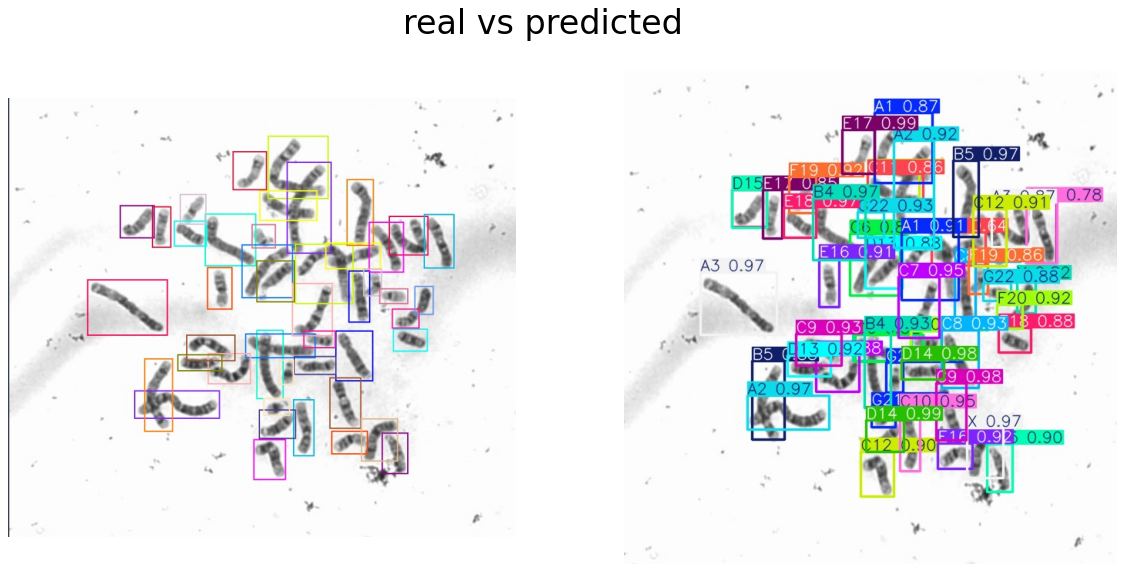

In [13]:
figure(figsize=(18, 8), dpi=80)

paths = [
    '/runs/104331.jpg',
    '/runs/result.jpg',
]
plt.suptitle("real vs predicted ", fontsize=30)
for num, fn in enumerate(paths):
  path = fn
  img = mpimg.imread(path)
  plt.subplot(1,len(paths),num+1)
  plt.axis('off')
  plt.imshow(img)

## Results

On train set we obtained a mAP50-95 of 0.779

On test set we obtained a mAP50-95 of 0.782

![ArchitectureImage](https://drive.google.com/uc?export=view&id=11kC6YgcHwMrpIHI-nBq3B-fAddp7nxen)

train
![ArchitectureImage](https://drive.google.com/uc?export=view&id=11Q2kHIcfDREGYUFBfccl9zEiqeke3SGh)

test
![ArchitectureImage](https://drive.google.com/uc?export=view&id=12dY5OTM-KoMl0T5blpf6EkFaaV3w-IaG)

## Conclusions

According to the results obtained, YOLOv8 proves to be a effective tool in the chromosome identification process. The model's ability to detect and classify chromosomes demonstrates its potential for applications in cytogenetics and genetic research.

However, it is important to note that the current performance is contingent on the computational resources available during training and inference. With access to better computing resources, such as high-performance GPUs or TPUs, it is feasible to train more robust models with deeper architectures. These enhanced models could potentially leverage larger datasets and more complex feature extraction mechanisms, leading to improved accuracy and robustness in chromosome identification.

In summary, while the results obtained with YOLOv8 are promising, there is substantial potential for improvement. By harnessing better computing resources and exploring advanced modeling techniques, significant enhancements in the accuracy and efficiency of chromosome identification can be achieved.

## References



*   Tseng, JJ., Lu, CH., Li, JZ. et al. An Open Dataset of Annotated Metaphase Cell Images for Chromosome Identification. Sci Data 10, 104 (2023). https://doi.org/10.1038/s41597-023-02003-7
*   Ultralytics. (2023). YOLOv8 Documentation. Retrieved from https://docs.ultralytics.com/models/yolov8/

